In [1]:
import Base.copy
using Distributions
using MLBase
include("Mondrian_Forest_Classifier.jl"); 
include("Mondrian_extention.jl")

expand_forest!

In [16]:
using MLBase
using Plots

function Fakedata3Classif(N,d,N_test=0)
    X = randn((N,d))
    param1 = randn(d)
    param2 = randn(d)
    Y = ( sum(X*param1,2) .> mean(sum(X*param2,2)) )
    Y=convert(Array{Int},Y)
    for i in 1:size(X,1)
        if X[i,2] > 1.5
            Y[i] = 2
        end
    end
    if (N_test > 0)
        x = randn((N_test,d))
        y = ( sum(x*param1,2) .> mean(sum(x*param2,2)) )
        y=convert(Array{Int},y)
        for i in 1:size(x,1)
            if x[i,2] > 1.5
                y[i] = 2
            end
        end
        return X,Y,x,y
    end
    return X,Y
end

Fakedata3Classif (generic function with 2 methods)

In [18]:
X, Y,x ,y = Fakedata3Classif(1500,16,500); #X,Y: train set ; x,y: extention data
Y = Y.+1;
y = y.+1;

In [19]:
MF=Mondrian_Forest_Classifier(100)
Acc=zeros(150);
Time=[];

In [20]:
x

500×16 Array{Float64,2}:
 -0.701758   -1.46735     0.389298  -0.18651   …  -1.32355     -0.226757  
 -1.43788     2.86724     1.27878    1.62199       0.326613     1.61276   
  0.767641   -1.47372    -1.54694   -1.20697      -1.40059     -0.518752  
 -0.257705   -0.922791    0.107397  -0.292438     -0.00634043  -0.983263  
  0.657491    2.37941     1.36277    0.684893     -1.6475       1.70877   
 -0.155571   -0.760551    1.3225    -0.513903  …   0.439302     0.971021  
 -1.454       1.01817    -0.352181   0.383834     -0.621891     1.7637    
  0.863221   -2.23734     1.2631     0.411845     -0.245279     0.235644  
 -0.514174    0.516394   -0.911435   0.449997     -0.525247     0.535894  
  0.0387319   1.30836     0.515084  -0.622432     -0.195338    -0.203011  
  0.219404   -2.01167    -0.954414   0.290355  …  -0.724184     0.00637234
 -0.979391   -1.55555     0.365659  -0.506603     -0.402962     0.0593035 
 -0.713455    1.95369     0.411512   0.119695      0.413343     1.76076   


In [21]:
counter=1
train!(MF,X[1:150,:],Y[1:150],1e9);
pred=predict!(MF,x)
Acc[counter]=correctrate(y,convert(Array{Int,1},pred))

0.522

In [24]:
MN = Mondrian_Forest_Classifier(100)
train!(MN,X,Y,1e9)
pred=predict!(MN,X)
correctrate(Y,convert(Array{Int,1},pred))

0.8353333333333334

In [25]:
expand_forest!(MF,X[151:1500,:],Y[151:1500,:],1e9);
pred=predict!(MF,X)
Acc[counter]=correctrate(Y,convert(Array{Int,1},pred))

0.06333333333333334

In [10]:
i=151
while i<1500
    counter = counter+1
    tic()
    expand_forest!(MF,X[i:i+149,:],Y[i:i+149,:],1e9);
    t=toq()
    println("The time is")
    println(t)
    push!(Time,t)
    pred=predict!(MF,x)
    Acc[counter]=correctrate(y,convert(Array{Int,1},pred))
    i=i+150
    println("The accrucary")
    println(Acc[counter])
end

The time is
0.357283442

The accrucary
0.104
The time is
0.069006813

The accrucary
0.08
The time is
0.000117625

The accrucary
0.082
The time is
0.000122409

The accrucary
0.076
The time is
0.000135134

The accrucary
0.074
The time is
0.000207637

The accrucary
0.078
The time is
0.000127476

The accrucary
0.076
The time is
0.000176991

The accrucary
0.076
The time is
0.000181631

The accrucary
0.078


In [15]:
length(Time)

99

In [28]:
x=linspace(1,73,73)

1.0:1.0:73.0

In [31]:
using Plots

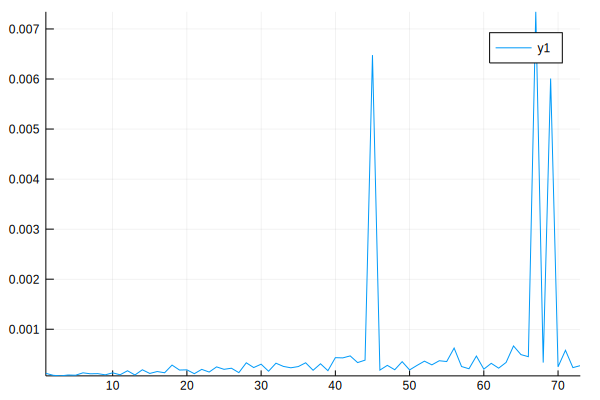

In [32]:
collect(x)
plot(x,Time)

In [33]:
A=Acc[1:73]

73-element Array{Float64,1}:
 0.0   
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 ⋮     
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722
 0.4722

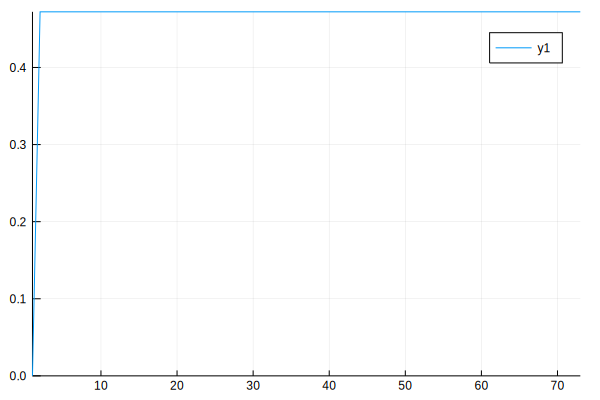

In [34]:
plot(x,A)

In [26]:
Letter = readdlm("Letter.txt");

In [28]:
classes = map(x->convert(Int,x[1][1]), Letter[:,1])
classes -= minimum(classes);

In [38]:
train_data = Letter[1:15000,2:17]*1.0;

In [44]:
train_labels = classes[1:15000,1];

In [39]:
test_data = Letter[15001:20000,2:17]*1.0;

In [45]:
test_labels = classes[15001:20000,1];

In [56]:
MF=Mondrian_Forest_Classifier(100)
Acc=zeros(150);
Time=[];    

In [58]:
counter=1
tic
train!(MF,train_data[1:150,:],train_labels[1:150,:],1e9);
t=toq
push!(Time,t)
pred=predict!(MF,test_data)
Acc[counter]=correctrate(y,convert(Array{Int,1},pred))

0.4792

In [59]:
i=151
while i<15000
    counter = counter+1
    println(counter)
    tic()
    expand_forest!(MF,train_data[i:i+149,:],train_labels[i:i+149,:],1e9);
    t=toq()
    println(t)
    push!(Time,t)
    pred=predict!(MF,test_data)
    Acc[counter]=correctrate(test_labels,convert(Array{Int,1},pred))
    i=i+150
    println(Acc[counter])
end

2
7.3789e-5
0.0384
3
0.000141335
0.0384
4
0.000124923
0.0384
5
0.000110011


LoadError: [91mInterruptException:[39m

In [62]:
MN = Mondrian_Forest_Classifier(100)
train!(MN,train_data,train_labels,1e9)
print("")
pred=predict!(MN,test_data)
correctrate(test_labels,convert(Array{Int,1},pred))

0.0736

In [82]:
MN.Trees[1].Tree.leaves[6].Gₚ

26-element Array{Float64,1}:
 0.0625    
 0.0       
 0.0       
 0.00178571
 0.0767857 
 0.0482143 
 0.0       
 0.346429  
 0.0910714 
 0.0       
 0.1125    
 0.0       
 0.0       
 0.0       
 0.0625    
 0.0       
 0.00178571
 0.0232143 
 0.00714286
 0.0       
 0.00178571
 0.0       
 0.0       
 0.075     
 0.0892857 
 0.0       